#  CAO Points Analysis


https://www.independent.ie/life/family/learning/understanding-your-cao-course-guide-26505318.html


The Mid point is the points score of the applicant in the middle of a list of offerees placed in points score order


Where the letters AQA appear instead of points, it means that all qualified applicants for a course were offered a place. AQA sometimes suggests that the points of the last qualified applicant being offered a place were less than 100.

matriculation - http://www2.cao.ie/downloads/documents/Guidelines-EU-EFTA.pdf


# Imports

In [316]:
# Regular expressions 
import re
# Convenient HTTP requests
import requests as rq
# Dates and times
import datetime as dt
# Import numpy module
import numpy as np
# For downloading.
import urllib.request as urlrq
import urllib.parse as urlpar
# Import tabula to read table in pdf
import tabula as tb
# Import mathplotlib
import matplotlib.pyplot as plt
# Import time
import time
# import pandas
import pandas as pd 
# import seaborn
import seaborn as sns
# import warnings
import warnings
warnings.filterwarnings("ignore")

# Error Checks

In [317]:
########################################################################
# Set Datetime Globally for referencing
########################################################################
# Get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

print(nowstr)

20211221_172121


In [318]:
########################################################################
# Function to test URLs
# https://pytutorial.com/check-url-is-reachable
########################################################################
def url_checker(url):
	try:
		#Get Url
		resp = rq.get(url)
		# if the request succeeds
		if resp.status_code == 404:
			print(f"{url}: is not reachable")
		else:
			print(f"{url}: is reachable")
			

	#Exception
	except rq.exceptions.RequestException as e:
        # print URL with Errs
		raise SystemExit(print(f"{url}: is Not reachable \nErr: {e}"))

# Save functions

In [319]:
########################################################################
# Function to save CAO Webpages 
########################################################################

def htmlcopy(url):
    # Fetch the CAO points URL
    resp = rq.get(url)
    # Check connection '<Response [200]>' means OK
    if resp.status_code == 200:
        print(f"{url}: is reachable")

        path = 'data/' + nowstr + '_CAO_Webpage_' + url[-4:] + '.html'
        print(str(path))

        # Save the original html file.
        with open(path, 'w') as f:
            f.write(resp.text)
    else:
        print(f"{url}: is not reachable")
    

In [320]:
########################################################################
# Function to save files
########################################################################

def caosavefile(url):
    split = urlpar.urlsplit(url)
    path = 'data/' + nowstr + '_CAO_file_' + split.path.split("/")[-1]
    print(str(path))
    urlrq.urlretrieve(url, path)

# CAO Webpage links

In [321]:
########################################################################
# CAO web pages
# https://www.cao.ie/index.php?page=points&p=2018
# https://www.cao.ie/index.php?page=points&p=2019
# https://www.cao.ie/index.php?page=points&p=2020
# https://www.cao.ie/index.php?page=points&p=2021
########################################################################

html2018 = 'https://www.cao.ie/index.php?page=points&p=2018'
html2019 = 'https://www.cao.ie/index.php?page=points&p=2019'
html2020 = 'https://www.cao.ie/index.php?page=points&p=2020'
html2021 = 'https://www.cao.ie/index.php?page=points&p=2021'

caopointshtml = [html2018,html2019,html2020,html2021]

for url in caopointshtml:
    htmlcopy(url)

https://www.cao.ie/index.php?page=points&p=2018: is reachable
data/20211221_172121_CAO_Webpage_2018.html
https://www.cao.ie/index.php?page=points&p=2019: is reachable
data/20211221_172121_CAO_Webpage_2019.html
https://www.cao.ie/index.php?page=points&p=2020: is reachable
data/20211221_172121_CAO_Webpage_2020.html
https://www.cao.ie/index.php?page=points&p=2021: is reachable
data/20211221_172121_CAO_Webpage_2021.html


# CAO Points location

In [322]:
########################################################################
# CAO points files
# http://www2.cao.ie/points/lvl8_18.pdf
# http://www2.cao.ie/points/lvl76_18.pdf
# http://www2.cao.ie/points/lvl8_19.pdf
# http://www2.cao.ie/points/lvl76_19.pdf
# http://www2.cao.ie/points/CAOPointsCharts2020.xlsx
# http://www2.cao.ie/points/CAOPointsCharts2021.xlsx
########################################################################
CAO2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'
CAO2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'
CAO2019_8 = 'http://www2.cao.ie/points/lvl8_19.pdf'
CAO2019_76 = 'http://www2.cao.ie/points/lvl76_19.pdf'
CAO2018_8 = 'http://www2.cao.ie/points/lvl8_18.pdf'
CAO2018_76 = 'http://www2.cao.ie/points/lvl76_18.pdf'

########################################################################
# List of URL 
# Use function to test if available
########################################################################
caopointslist = [CAO2021,CAO2020,CAO2019_8, CAO2019_76,CAO2018_8, CAO2018_76]

for url in caopointslist:
    url_checker(url)
    caosavefile(url)
    

http://www2.cao.ie/points/CAOPointsCharts2021.xlsx: is reachable
data/20211221_172121_CAO_file_CAOPointsCharts2021.xlsx
http://www2.cao.ie/points/CAOPointsCharts2020.xlsx: is reachable
data/20211221_172121_CAO_file_CAOPointsCharts2020.xlsx
http://www2.cao.ie/points/lvl8_19.pdf: is reachable
data/20211221_172121_CAO_file_lvl8_19.pdf
http://www2.cao.ie/points/lvl76_19.pdf: is reachable
data/20211221_172121_CAO_file_lvl76_19.pdf
http://www2.cao.ie/points/lvl8_18.pdf: is reachable
data/20211221_172121_CAO_file_lvl8_18.pdf
http://www2.cao.ie/points/lvl76_18.pdf: is reachable
data/20211221_172121_CAO_file_lvl76_18.pdf


# Set up data 

# 2021 Points
# Load the spreadsheet using pandas

https://www.cao.ie/index.php?page=points&p=2021

In [323]:
# Download and parse the excel spreadsheet.
# 1451 rows × 15 columns
# Skip first 10 Rows
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df = pd.read_excel(CAO2021, skiprows=11)


DF2021 = df[['Course Code','Course Title','R1 Points','R2 Points ','EOS Points','EOS Midpoints', 'CATEGORY (ISCED Description)', 'HEI']] 

DF2021 = DF2021.rename(columns={'Course Code': 'Code', 'Course Title': 'Title', 'R1 Points': '21_R1 Points', 'R2 Points ': '21_R2 Points', 'EOS Points': '21_EOS',
        'EOS Midpoints': '21_Mid', 'CATEGORY (ISCED Description)': 'Category', 'HEI': 'College'})

DF2021

,Code,Title,21_R1 Points,21_R2 Points,21_EOS,21_Mid,Category,College
0,AL605,Music and Instrument Technology,211,NaN,211,319,Engineering and engineering trades,Athlone Institute of Technology
1,AL630,Pharmacy Technician,308,NaN,308,409,Health,Athlone Institute of Technology
2,AL631,Dental Nursing,311,NaN,311,400,Health,Athlone Institute of Technology
3,AL632,Applied Science,297,NaN,297,454,Biological and related sciences,Athlone Institute of Technology
4,AL650,Business,AQA,AQA,AQA,351,Business and administration,Athlone Institute of Technology
...,...,...,...,...,...,...,...,...
1446,WD211,Creative Computing,270,NaN,270,392,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1447,WD212,Recreation and Sport Management,262,NaN,262,304,Personal services,Waterford Institute of Technology
1448,WD230,Mechanical and Manufacturing Engineering,230,230,230,361,Engineering and engineering trades,Waterford Institute of Technology
1449,WD231,Early Childhood Care and Education,266,NaN,266,366,Welfare,Waterford Institute of Technology


# 2020 Points
# Load the spreadsheet using pandas

https://www.cao.ie/index.php?page=points&p=2020


In [324]:
# Download and parse the excel spreadsheet.
# 1464 rows × 23 columns
# Skip first 10 Rows
df = pd.read_excel(CAO2020, skiprows=10)


DF2020 = df[['COURSE CODE2','COURSE TITLE','R1 POINTS','R2 POINTS','EOS','EOS Mid-point','CATEGORY (i.e.ISCED description)', 'HEI']] 

DF2020 = DF2020.rename(columns={'COURSE CODE2': 'Code', 'COURSE TITLE': 'Title', 'R1 POINTS': '20_R1 Points', 'R2 POINTS': '20_R2 Points', 'EOS': '20_EOS', 
    'EOS Mid-point': '20_Mid', 'CATEGORY (i.e.ISCED description)': 'Category', 'HEI': 'College'})

DF2020

,Code,Title,20_R1 Points,20_R2 Points,20_EOS,20_Mid,Category,College
0,AC120,International Business,209,NaN,209,280,Business and administration,American College
1,AC137,Liberal Arts,252,NaN,252,270,Humanities (except languages),American College
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
...,...,...,...,...,...,...,...,...
1459,WD208,Manufacturing Engineering,188,NaN,188,339,Manufacturing and processing,Waterford Institute of Technology
1460,WD210,Software Systems Development,279,NaN,279,337,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1461,WD211,Creative Computing,271,NaN,271,318,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1462,WD212,Recreation and Sport Management,270,NaN,270,349,Personal services,Waterford Institute of Technology


# 2019 Points
# Load the spreads pdf

https://www.cao.ie/index.php?page=points&p=2019

- CAO2019_8 = 'http://www2.cao.ie/points/lvl8_19.pdf' - 930 rows × 4 columns
- CAO2019_76 = 'http://www2.cao.ie/points/lvl76_19.pdf' - 461 rows × 4 columns
- DF2019 = 1391 rows × 4 columns

https://stackoverflow.com/questions/37826926/how-to-trim-starting-spaces-of-entire-column-in-libreoffice-or-google-sheets

Remove all special charcters



In [325]:
# Read csvs into 2019 pandas dataframe
# https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://www.kite.com/python/answers/how-to-make-a-single-pandas-dataframe-from-multiple-%60.csv%60-files-in-python

csvfiles = ['lvl8_19.csv', 'lvl76_19.csv']

dflist = []

colname = ['Code', 'Title', '19_EOS', '19_Mid']

for filename in csvfiles:
    dflist.append(pd.read_csv(filename, sep=',' , skiprows = 1,header = None, names = colname ))
    
DF2019 = pd.concat(dflist)

DF2019

,Code,Title,19_EOS,19_Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
456,WD188,Applied Health Care,206,339.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0
458,WD206,Electronic Engineering,191,322.0
459,WD207,Mechanical Engineering,179,330.0


# 2018 Points
# Load the spreads pdf

https://www.cao.ie/index.php?page=points&p=2018

- CAO2018_8 = 'http://www2.cao.ie/points/lvl8_18.pdf' - 914 rows × 4 columns
- CAO2018_76 = 'http://www2.cao.ie/points/lvl76_18.pdf' - 471 rows × 4 columns
- DF2018 = 1385 rows × 4 columns

In [326]:
# Read csvs into 2018 pandas dataframe

csvfiles = ['lvl8_18.csv', 'lvl76_18.csv']

dflist = []

colname = ['Code', 'Title', '18_EOS', '18_Mid']

for filename in csvfiles:
    dflist.append(pd.read_csv(filename, sep=',' , skiprows = 1,header = None, names = colname ))
    
DF2018 = pd.concat(dflist)

DF2018

,Code,Title,18_EOS,18_Mid
0,AL801,Software Design Game Development or Cloud Comp...,295,326.0
1,AL810,Quantity Surveying,300,340.0
2,AL820,Mechanical and Polymer Engineering,299,371.0
3,AL830,General Nursing,418,440.0
4,AL832,Psychiatric Nursing,377,388.0
...,...,...,...,...
466,WD205,Molecular Biology with Biopharmaceutical Science,217,398.0
467,WD206,Electronic Engineering,175,330.0
468,WD207,Mechanical Engineering,182,362.0
469,WD208,Manufacturing Engineering,180,298.0


# Join all Dataframes

DF2021 [['Code', 'Title', '21_R1 Points', '21_R2 Points', '21_EOS', '21_Mid', 'Category', 'College']]

DF2020 [['Code', 'Title', '20_R1 Points', '20_R2 Points', '20_EOS', '20_Mid', 'Category', 'College']]

DF2019 [['Code', 'Title',  '19_EOS', '19_Mid']]

DF2018 [['Code', 'Title',  '18_EOS', '18_Mid']]

Estimate = 1874 courses

In [327]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Estimate = 1874 indiviual courses codes
# Merge all Dataframes
# Drop all dupicates on Code only

lvl_21 = DF2021[['Code', 'Title']]
lvl_20 = DF2020[['Code', 'Title']]
lvl_19 = DF2019[['Code', 'Title']]
lvl_18 = DF2018[['Code' , 'Title']]

frames = [lvl_21, lvl_20, lvl_19, lvl_18]

Codes = pd.concat(frames)

AllCourses = Codes.drop_duplicates('Code').reset_index(drop=True)

# Add College Code
# https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/
AllCourses['College Code'] = AllCourses['Code'].str[:2]

AllCourses

,Code,Title,College Code
0,AL605,Music and Instrument Technology,AL
1,AL630,Pharmacy Technician,AL
2,AL631,Dental Nursing,AL
3,AL632,Applied Science,AL
4,AL650,Business,AL
...,...,...,...
1869,TL621,Hotel Operations,TL
1870,TL622,Travel and Tourism Studies,TL
1871,TL720,Travel and Tourism Management,TL
1872,WD040,Building Services Engineering,WD


In [328]:
# Check to see if any missing College code
# https://datatofish.com/rows-with-nan-pandas-dataframe/

AllCourses[AllCourses['College Code'].isna()]

,Code,Title,College Code


In [329]:
# Set indexes of Code for df in AllCourses
AllCourses.set_index('Code', inplace=True)

# Join all EOS 
DF2021.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2021[['Category', '21_R1 Points', '21_R2 Points','21_EOS', '21_Mid']])

DF2020.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2020[['20_R1 Points', '20_R2 Points','20_EOS', '20_Mid']])

DF2019.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2019[['19_Mid']])

DF2018.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2018[['18_Mid']])

AllCourses

,Title,College Code,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,
AC120,International Business,AC,Business and administration,294,294,294,352,209,NaN,209,280,269.0,288.0
AC137,Liberal Arts,AC,Humanities (except languages),271,270,270,334,252,NaN,252,270,275.0,298.0
AD101,"First Year Art and Design (Common Entry,portfo...",AD,Arts,554,NaN,554,604,#+matric,NaN,#+matric,#+matric,550.0,NaN
AD102,Graphic Design and Moving Image Design (portfo...,AD,Arts,538,NaN,538,625,#+matric,NaN,#+matric,#+matric,635.0,NaN
AD103,Textile and Surface Design and Jewellery and O...,AD,Arts,505,NaN,505,581,#+matric,NaN,#+matric,#+matric,545.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,WD,Information and Communication Technologies (ICTs),270,NaN,270,392,271,NaN,271,318,322.0,326.0
WD212,Recreation and Sport Management,WD,Personal services,262,NaN,262,304,270,NaN,270,349,311.0,338.0
WD230,Mechanical and Manufacturing Engineering,WD,Engineering and engineering trades,230,230,230,361,253,NaN,253,369,348.0,NaN


# CAO Guidelines
matriculation - http://www2.cao.ie/downloads/documents/Guidelines-EU-EFTA.pdf

The matriculation and English language requirements are the minimum and will be higher for certain courses and in certain institutions. Applicants must also refer to HEI websites for details of specific subject requirements and previous points requirements.

# independent.ie
https://www.independent.ie/life/family/learning/understanding-your-cao-course-guide-26505318.html
The Mid point is the points score of the applicant in the middle of a list of offerees placed in points score order
Where the letters AQA appear instead of points, it means that all qualified applicants for a course were offered a place. AQA sometimes suggests that the points of the last qualified applicant being offered a place were less than 100.

# 2021 info on file
You can filter your results by clicking on the dropdown  icon. It is possible to filter by category (i.e. ISCED description), by level, by HEI and by round.  
Example: If you wish to know the points data for all Level 8 Health courses, click on the dropdown icon in the CATEGORY column and select ‘Health’, then select ‘8’ in the Level column.
Clicking on these dropdown filters will return a list of all Level 8 Health courses in all HEIs, with the points requirements for Rounds 1 & 2, as well as EOS (end of season) and EOS Mid-point. For a new search, remember to clear filters from your previous search. 

# 2020 info on files
End of Season
Level 8, 7 & 6 with ISCED Broad Field Code
The details  given are for general information only and do not form part of any contract. They are not intended for use in determining whether any individual applicant is or is not entitled to an offer of a higher education place
Random * = Not all on this points score were offered places
\# = Test / Interview / Portfolio / Audition
AQA = All qualified applicants
avp = Available Places
v = New competition for available places resulted in a higher points cutoff

# 2019 info on file/s
The details given are for general information only and do not form
part of any contract. They are not intended for use in determining
whether any individual applicant is or is not entitled to an offer of a
higher education place
\* Not all on this points score were offered places
\# Test / Interview / Portfolio / Audition
AQA All qualified applicants

# 2018 info on file/s
The details given are for general information only and do not form
part of any contract. They are not intended for use in determining
whether any individual applicant is or is not entitled to an offer of a
higher education place
\* Not all on this points score were offered places
\# Test / Interview / Portfolio / Audition
AQA All qualified applicants


In [330]:
# Replace all AQA with 100
# Replace all # with NAN
# Replace all +matric with NAN
# Replace all blank/empty cells with NAN


# https://stackoverflow.com/questions/38277928/remove-special-characters-in-pandas-dataframe


AllCourses=AllCourses.replace('AQA','100',regex=True)
AllCourses=AllCourses.replace('\#','',regex=True)
AllCourses=AllCourses.replace('\+matric',np.nan,regex=True)
AllCourses=AllCourses.replace('',np.nan)

AllCourses

,Title,College Code,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,
AC120,International Business,AC,Business and administration,294,294,294,352.0,209,NaN,209,280.0,269.0,288.0
AC137,Liberal Arts,AC,Humanities (except languages),271,270,270,334.0,252,NaN,252,270.0,275.0,298.0
AD101,"First Year Art and Design (Common Entry,portfo...",AD,Arts,554,NaN,554,604.0,NaN,NaN,NaN,NaN,550.0,NaN
AD102,Graphic Design and Moving Image Design (portfo...,AD,Arts,538,NaN,538,625.0,NaN,NaN,NaN,NaN,635.0,NaN
AD103,Textile and Surface Design and Jewellery and O...,AD,Arts,505,NaN,505,581.0,NaN,NaN,NaN,NaN,545.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,WD,Information and Communication Technologies (ICTs),270,NaN,270,392.0,271,NaN,271,318.0,322.0,326.0
WD212,Recreation and Sport Management,WD,Personal services,262,NaN,262,304.0,270,NaN,270,349.0,311.0,338.0
WD230,Mechanical and Manufacturing Engineering,WD,Engineering and engineering trades,230,230,230,361.0,253,NaN,253,369.0,348.0,NaN


In [331]:
# https://devenum.com/pandas-convert-multiple-columns-to-float/
AllCourses[['21_R1 Points', '21_R2 Points','21_EOS', '21_Mid','20_R1 Points', '20_R2 Points','20_EOS', '20_Mid', '19_Mid', '18_Mid']]= AllCourses[['21_R1 Points', 
        '21_R2 Points','21_EOS', '21_Mid','20_R1 Points', '20_R2 Points','20_EOS', '20_Mid', '19_Mid', '18_Mid']].apply(pd.to_numeric)

<AxesSubplot:xlabel='College Code', ylabel='21_R1 Points'>

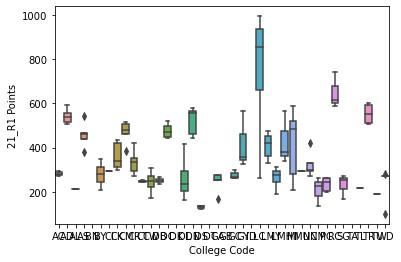

In [332]:
# Select to top colleges by courses 
# https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/

TOP5Colleges = AllCourses.groupby('College Code').head(5)

sns.boxplot(x='College Code', y='21_R1 Points', data=TOP5Colleges)

<AxesSubplot:xlabel='College Code', ylabel='21_R1 Points'>

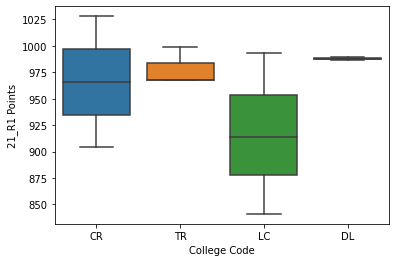

In [333]:
# https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
# Top 10 points by College Code for 2021
TOPpoints21 = AllCourses.nlargest(10,['21_R1 Points'])
sns.boxplot(x='College Code', y='21_R1 Points', data=TOPpoints21)

<AxesSubplot:xlabel='College Code', ylabel='20_R1 Points'>

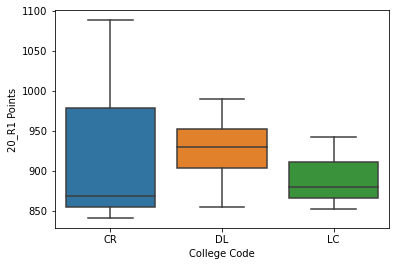

In [334]:
# Top 10 points by College Code for 2020
TOPpoints20 = AllCourses.nlargest(10,['20_R1 Points'])
sns.boxplot(x='College Code', y='20_R1 Points', data=TOPpoints20)

<AxesSubplot:xlabel='College Code', ylabel='21_R1 Points'>

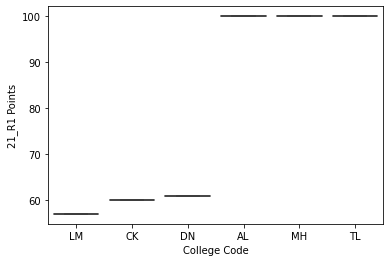

In [315]:
# Bottom 10 points by College Code for 2021
BOTpoints21 = AllCourses.nsmallest(10,['21_R1 Points',])
sns.boxplot(x='College Code', y='21_R1 Points', data=BOTpoints21)



# End